In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:


root = ''
train_df = pd.read_csv(root + 'train.csv')
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"], format='%Y-%m-%d %H:%M:%S')

weather_train_df = pd.read_csv(root + 'weather_train.csv')
test_df = pd.read_csv(root + 'test.csv')
test_df["hour"] = pd.to_datetime(test_df["timestamp"], format='%Y-%m-%d %H:%M:%S').dt.hour

weather_test_df = pd.read_csv(root + 'weather_test.csv')
building_meta_df = pd.read_csv(root + 'building_metadata.csv')
sample_submission = pd.read_csv(root + 'sample_submission.csv')

In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

weather_train_df = reduce_mem_usage(weather_train_df)
weather_test_df = reduce_mem_usage(weather_test_df)
building_meta_df = reduce_mem_usage(building_meta_df)

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to 636.26 Mb (60.0% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)


In [8]:
print(train_df)

          building_id  meter           timestamp  meter_reading
0                   0      0 2016-01-01 00:00:00       0.000000
1                   1      0 2016-01-01 00:00:00       0.000000
2                   2      0 2016-01-01 00:00:00       0.000000
3                   3      0 2016-01-01 00:00:00       0.000000
4                   4      0 2016-01-01 00:00:00       0.000000
...               ...    ...                 ...            ...
20216095         1444      0 2016-12-31 23:00:00       8.750000
20216096         1445      0 2016-12-31 23:00:00       4.825000
20216097         1446      0 2016-12-31 23:00:00       0.000000
20216098         1447      0 2016-12-31 23:00:00     159.574997
20216099         1448      0 2016-12-31 23:00:00       2.850000

[20216100 rows x 4 columns]


In [9]:
print(test_df)

            row_id  building_id  meter            timestamp  hour
0                0            0      0  2017-01-01 00:00:00     0
1                1            1      0  2017-01-01 00:00:00     0
2                2            2      0  2017-01-01 00:00:00     0
3                3            3      0  2017-01-01 00:00:00     0
4                4            4      0  2017-01-01 00:00:00     0
...            ...          ...    ...                  ...   ...
41697595  41697595         1444      0  2018-05-09 07:00:00     7
41697596  41697596         1445      0  2018-05-09 07:00:00     7
41697597  41697597         1446      0  2018-05-09 07:00:00     7
41697598  41697598         1447      0  2018-05-09 07:00:00     7
41697599  41697599         1448      0  2018-05-09 07:00:00     7

[41697600 rows x 5 columns]


In [10]:
print(weather_test_df)

        site_id            timestamp  air_temperature  cloud_coverage  \
0             0  2017-01-01 00:00:00        17.796875             4.0   
1             0  2017-01-01 01:00:00        17.796875             2.0   
2             0  2017-01-01 02:00:00        16.093750             0.0   
3             0  2017-01-01 03:00:00        17.203125             0.0   
4             0  2017-01-01 04:00:00        16.703125             2.0   
...         ...                  ...              ...             ...   
277238       15  2018-12-31 19:00:00         3.300781             NaN   
277239       15  2018-12-31 20:00:00         2.800781             NaN   
277240       15  2018-12-31 21:00:00         2.800781             NaN   
277241       15  2018-12-31 22:00:00         2.800781             NaN   
277242       15  2018-12-31 23:00:00         3.300781             NaN   

        dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             11.703125                NaN              1

In [11]:
print(building_meta_df)

      site_id  building_id                    primary_use  square_feet  \
0           0            0                      Education         7432   
1           0            1                      Education         2720   
2           0            2                      Education         5376   
3           0            3                      Education        23685   
4           0            4                      Education       116607   
...       ...          ...                            ...          ...   
1444       15         1444  Entertainment/public assembly        19619   
1445       15         1445                      Education         4298   
1446       15         1446  Entertainment/public assembly        11265   
1447       15         1447            Lodging/residential        29775   
1448       15         1448                         Office        92271   

      year_built  floor_count  
0         2008.0          NaN  
1         2004.0          NaN  
2         1991.

In [12]:
print(weather_train_df)

        site_id            timestamp  air_temperature  cloud_coverage  \
0             0  2016-01-01 00:00:00        25.000000             6.0   
1             0  2016-01-01 01:00:00        24.406250             NaN   
2             0  2016-01-01 02:00:00        22.796875             2.0   
3             0  2016-01-01 03:00:00        21.093750             2.0   
4             0  2016-01-01 04:00:00        20.000000             2.0   
...         ...                  ...              ...             ...   
139768       15  2016-12-31 19:00:00         3.000000             NaN   
139769       15  2016-12-31 20:00:00         2.800781             2.0   
139770       15  2016-12-31 21:00:00         2.800781             NaN   
139771       15  2016-12-31 22:00:00         2.199219             NaN   
139772       15  2016-12-31 23:00:00         1.700195             NaN   

        dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             20.000000                NaN              1

In [14]:
train_building1 = train_df.loc[train_df.building_id == 1]

In [15]:
train_build1_meter0 = train_building1.loc[train_building1.meter == 0]

                   timestamp  meter_reading
1        2016-01-01 00:00:00       0.000000
2302     2016-01-01 01:00:00       0.000000
4595     2016-01-01 02:00:00       0.000000
6894     2016-01-01 03:00:00       0.000000
9190     2016-01-01 04:00:00       0.000000
...                      ...            ...
20204275 2016-12-31 19:00:00      68.255997
20206638 2016-12-31 20:00:00      52.420601
20209004 2016-12-31 21:00:00      53.512699
20211369 2016-12-31 22:00:00      54.331799
20213735 2016-12-31 23:00:00      51.055500

[8784 rows x 2 columns]


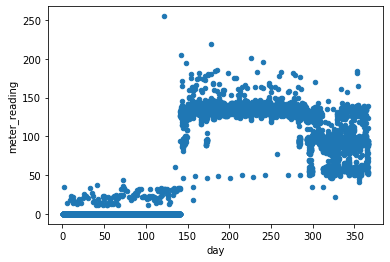

In [77]:
plot = train_build1_meter0
plot = plot.drop(columns=["meter","building_id"])
print(plot)
for (i,base) in plot.iterrows():
    plot.at[i,"day"] = base.timestamp.dayofyear
plot = plot.drop(columns=["timestamp",])
plot.plot.scatter("day","meter_reading")
plt.show()